In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from plotter import P_over_E_parameter
from events import list_of_params
from functions import ic_params
from plotter import oscillogram

def list_of_params_5gen(dict,dm51_range, th25_range, th35_range):
    def update_dict(dict,p):
        dict2 = dict.copy()
        dict2.update(p)
        return dict2
    dict_list = [update_dict(dict,{'dm_51':dm, 'theta_25': th25, 'theta_35': th35}) for dm in dm51_range for th25 in th25_range for th35 in th35_range]
    return dict_list

In [30]:
E_range = np.logspace(np.log10(500),4,50)
dm51_range = [0.5]#np.linspace(-1e-1,1e-1,3)
th25_range = [0,0.2]#np.linspace(-1e-1,1e-1,3)
th35_range = [0,0.2]
params = ic_params.copy()
anti=True
params.update({'theta_24': np.arcsin(np.sqrt(0.032)), 'dm_41':0.93, 'theta_34': 0, 'theta_35': 0, 'theta_15': 0})
params_5gen = list_of_params_5gen(params, dm51_range, th25_range,th35_range)
zenith = -1

Pamax = P_over_E_parameter('m',params_5gen,E=E_range, ndim=5, nsi=False, anti=True,zenith=zenith)
Pmx = P_over_E_parameter('m',params_5gen,E=E_range, ndim=5, nsi=False, anti=False,zenith=zenith)

#Pmm = P_over_E_parameter('m',[params],E=E_range, ndim=5, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
#Pmm_3gen = P_over_E_parameter('m',params,E=E_range, ndim=3, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
#Pmm_5gen=Pmm_5gen.reshape(len(dm51_range)*len(th25_range),-1)
Pmm = Pmx[:,1,:]
Pamam = Pamax[:,1,:]
Pmt = Pmx[:,2,:]
Pamat = Pamax[:,2,:]

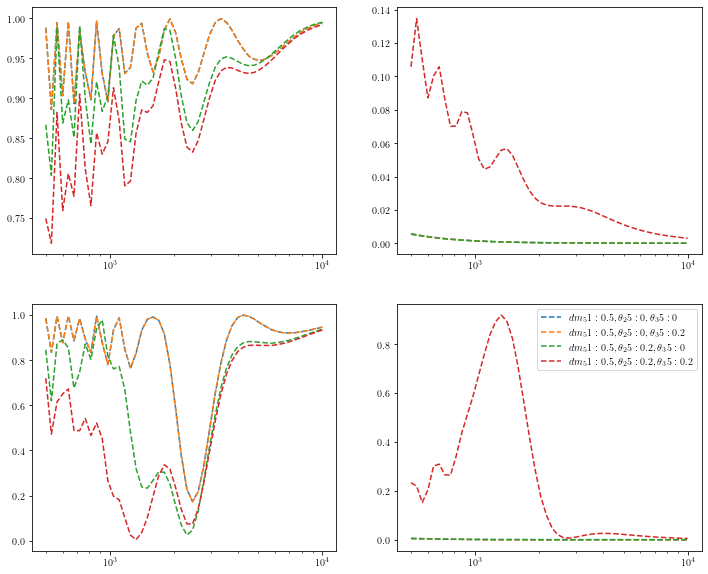

In [31]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax = ax.flatten()
for p in range(Pmx.shape[0]):
    ax[0].plot(E_range, Pmm[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_25: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
    ax[1].plot(E_range, Pmt[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_25: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
    ax[2].plot(E_range, Pamam[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_25: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
    ax[3].plot(E_range, Pamat[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_{"25"}: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
#plt.plot(E_range, Pmm, label='3+1',c='red')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
ax[3].set_xscale('log')
ax[3].legend()